# Charles Wallis
4391.001

4/30/2023

Assignment 2

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_image(title, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def gray_level_histogram(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.hist(gray_image.ravel(), 256, [0, 256])
    plt.show()
    return gray_image

def threshold_image(gray_image, th_value, max_value=255):
    _, thresh = cv2.threshold(gray_image, th_value, max_value, cv2.THRESH_BINARY)
    return thresh

def threshold_grayscale_image(gray_image, th_values, max_value=255):
    segmented_image = np.zeros_like(gray_image)
    for i in range(len(th_values) + 1):
        lower_bound = th_values[i-1] if i > 0 else 0
        upper_bound = th_values[i] if i < len(th_values) else max_value
        mask = cv2.inRange(gray_image, lower_bound, upper_bound)
        segmented_image[mask > 0] = max_value // len(th_values) * i
    return segmented_image

def k_means_segmentation(image, k, random_state=42):
    reshaped_image = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(reshaped_image)
    labels = kmeans.labels_.reshape(image.shape[:2])
    segmented_image = np.zeros_like(image)

    for i in range(k):
        segmented_image[labels == i] = [255 * (i % 2), 255 * ((i // 2) % 2), 255 * (i // 4)]

    return segmented_image

def edge_and_contour_detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(image)
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)
    return contour_image

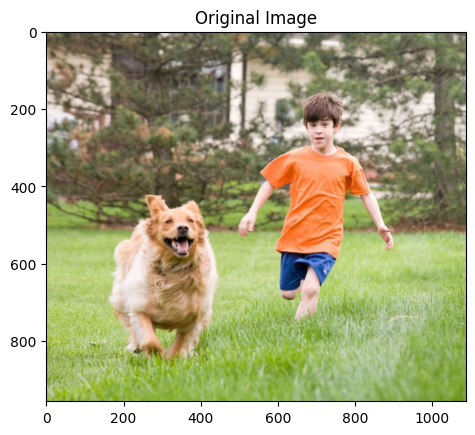

In [ ]:
# Read the image
image = cv2.imread('/content/drive/MyDrive/UTD/.UTD 2023 Spring/4391/sample.jpg')
show_image('Original Image', image)

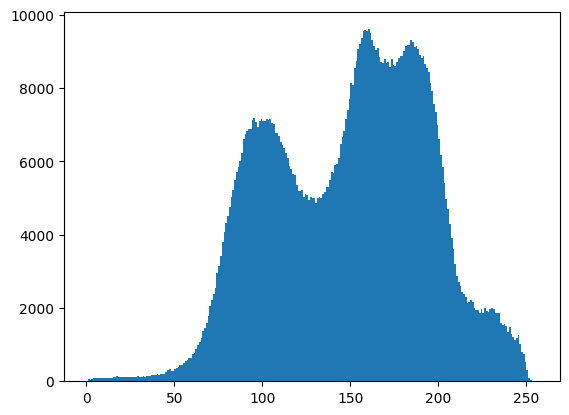

In [ ]:
# a. Generate the grey level histogram of the image
gray_image = gray_level_histogram(image)

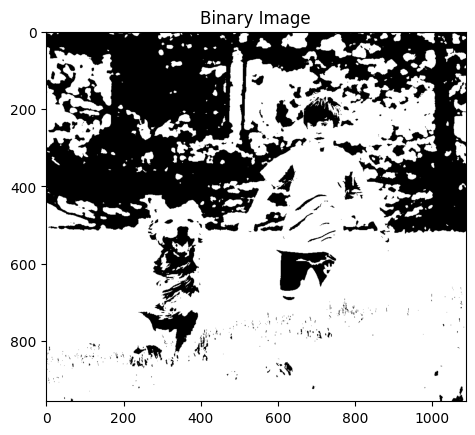

True

In [ ]:
# a.i. Threshold the image into a black-and-white (binary) image
binary_image = threshold_image(gray_image, 128)
show_image('Binary Image', binary_image)
cv2.imwrite('binary_image.jpg', binary_image)

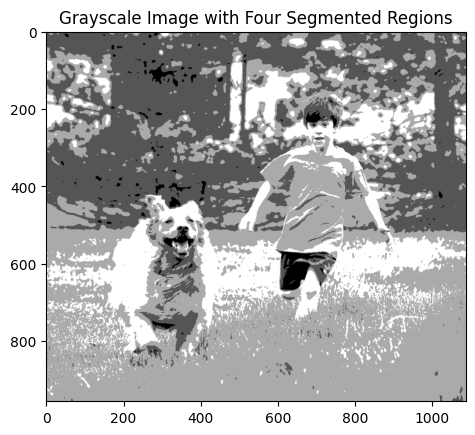

True

In [ ]:
# a.ii. Threshold the image into a grayscale image with four segmented regions
segmented_grayscale_image = threshold_grayscale_image(gray_image, [64, 128, 192])
show_image('Grayscale Image with Four Segmented Regions', segmented_grayscale_image)
cv2.imwrite('grayscale_image_four_regions.jpg', segmented_grayscale_image)

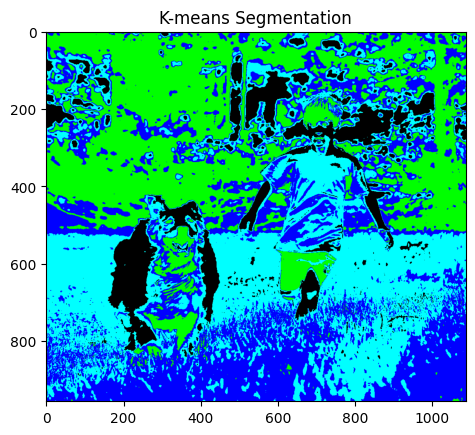

True

In [ ]:
# b. K-means clustering segmentation
k_means_segmented_image = k_means_segmentation(image, 4)
show_image('K-means Segmentation', k_means_segmented_image)
cv2.imwrite('k_means_segmentation.jpg', k_means_segmented_image)

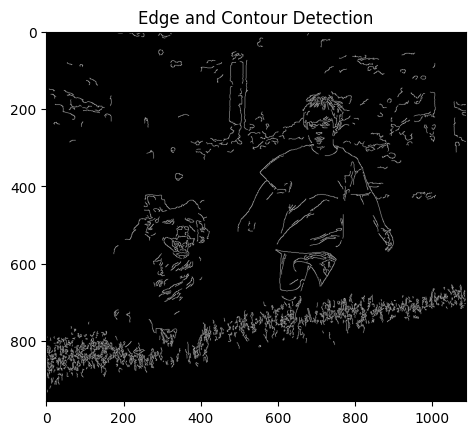

True

In [ ]:
# c. Edge and contour detection segmentation
contour_image = edge_and_contour_detection(image)
show_image('Edge and Contour Detection', contour_image)
cv2.imwrite('edge_and_contour_detection.jpg', contour_image)